# Regression models with Regularization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np. __version__

'1.21.6'

In [5]:
pd. __version__

'1.3.5'

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
# for holdout cv
from sklearn.model_selection import train_test_split

In [8]:
# for K-fold cv
from sklearn.linear_model import RidgeCV, LassoCV

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso

In [10]:
df = pd.read_csv('Hitters.csv')
df.shape

(322, 20)

In [11]:
df.iloc[:5,-10:]

,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,30,29,14,A,E,446,33,20,NaN,A
1,321,414,375,N,W,632,43,10,475.0,N
2,224,266,263,A,W,880,82,14,480.0,A
3,828,838,354,N,E,200,11,3,500.0,N
4,48,46,33,N,E,805,40,4,91.5,N


In [12]:
# drop NAs

In [13]:
d0 = df.dropna()
d0.shape

(263, 20)

In [14]:
y = d0.Salary
x0 = d0.drop(['Salary'],axis=1)

In [15]:
x0.dtypes

AtBat         int64
Hits          int64
HmRun         int64
Runs          int64
RBI           int64
Walks         int64
Years         int64
CAtBat        int64
CHits         int64
CHmRun        int64
CRuns         int64
CRBI          int64
CWalks        int64
League       object
Division     object
PutOuts       int64
Assists       int64
Errors        int64
NewLeague    object
dtype: object

In [16]:
# catgories of categorical columns

In [17]:
x2 = x0.loc[:,x0.dtypes == object]
for i in x2.columns:
    print(x2[i].value_counts())

A    139
N    124
Name: League, dtype: int64
W    134
E    129
Name: Division, dtype: int64
A    141
N    122
Name: NewLeague, dtype: int64


In [18]:
# substitute categorical cols with dummy vars

x = pd.get_dummies(x0,
                   columns = ['League','Division','NewLeague'],
                   drop_first=True)
x.iloc[:5,-10:]

,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,69,321,414,375,632,43,10,1,1,1
2,63,224,266,263,880,82,14,0,1,0
3,225,828,838,354,200,11,3,1,0,1
4,12,48,46,33,805,40,4,1,0,1
5,19,501,336,194,282,421,25,0,1,0


In [19]:
x.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
PutOuts        int64
Assists        int64
Errors         int64
League_N       uint8
Division_W     uint8
NewLeague_N    uint8
dtype: object

In [20]:
X = x.astype('float64')

## Ridge Regression

In [21]:
model = Ridge(alpha = 0, normalize = True)
model.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0, normalize=True)

In [22]:
# Create an array of 100 alpha values 
# ranging from very small to very large

In [23]:
alphas = 10**np.linspace(10,-2,100)

In [24]:
alphas.shape

(100,)

In [25]:
# 10^(-2)
alphas.min()

0.01

In [26]:
# 10^!0
alphas.max()

10000000000.0

In [27]:
# fit 100 Ridge regression models, 
# one for each alpha (normalizing all cols)

In [28]:
scaler = StandardScaler(with_mean = False)
scaler.fit(X)
X_scaled = scaler.transform(X)

In [29]:
model = Ridge(alpha=0)

In [30]:
coefs = []
for a in alphas:
    model.set_params(alpha = a*263)
    model.fit(X_scaled, y)
    coefs.append(model.coef_/X.std())

In [31]:
# regression coefficients of the last model
pd.DataFrame(coefs[99], index = X.columns)

,0
AtBat,-1.580559
Hits,5.535534
HmRun,0.631065
Runs,-0.279468
RBI,0.064173
Walks,5.154704
Years,-10.339852
CAtBat,-0.053339
CHits,0.191263
CHmRun,0.676647


In [32]:
# Store all regression coeffs in a DataFrame

In [33]:
df = pd.DataFrame(coefs)
df.columns = x.columns
df.index = alphas
df.index.name = 'alpha'
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,1.206660e-10,4.377094e-10,1.763732e-09,7.401996e-10,7.818834e-10,9.202286e-10,3.763337e-09,1.036034e-11,3.812902e-11,2.875454e-10,7.649532e-11,7.894484e-11,8.352300e-11,4.833070e-11,7.894151e-12,-3.680759e-11,-1.285753e-09,-1.730645e-08,-2.554306e-10
7.564633e+09,1.595133e-10,5.786260e-10,2.331550e-09,9.785003e-10,1.033604e-09,1.216488e-09,4.974910e-09,1.369576e-11,5.040431e-11,3.801181e-10,1.011223e-10,1.043604e-10,1.104125e-10,6.389035e-11,1.043560e-11,-4.865747e-11,-1.699690e-09,-2.287811e-08,-3.376642e-10
5.722368e+09,2.108672e-10,7.649096e-10,3.082172e-09,1.293520e-09,1.366363e-09,1.608126e-09,6.576538e-09,1.810499e-11,6.663154e-11,5.024937e-10,1.336777e-10,1.379584e-10,1.459588e-10,8.445928e-11,1.379525e-11,-6.432232e-11,-2.246890e-09,-3.024352e-08,-4.463722e-10
4.328761e+09,2.787540e-10,1.011165e-09,4.074449e-09,1.709957e-09,1.806252e-09,2.125848e-09,8.693796e-09,2.393373e-11,8.808297e-11,6.642671e-10,1.767141e-10,1.823728e-10,1.929490e-10,1.116502e-10,1.823651e-11,-8.503032e-11,-2.970257e-09,-3.998015e-08,-5.900778e-10
3.274549e+09,3.684964e-10,1.336701e-09,5.386182e-09,2.260463e-09,2.387759e-09,2.810245e-09,1.149269e-08,3.163899e-11,1.164405e-10,8.781221e-10,2.336056e-10,2.410861e-10,2.550672e-10,1.475950e-10,2.410760e-11,-1.124051e-10,-3.926505e-09,-5.285141e-08,-7.800481e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-1.028700e+00,3.739718e+00,-9.182336e-01,6.939502e-01,5.339658e-01,4.056337e+00,-1.055843e+01,-1.377871e-02,1.596741e-01,7.181724e-01,4.021751e-01,2.999470e-01,-4.017868e-01,2.710834e-01,2.149988e-01,-3.834378e+00,5.751891e+01,-1.239667e+02,-2.364769e+01
2.310130e-02,-1.185117e+00,4.211671e+00,-5.948357e-01,4.874766e-01,4.289051e-01,4.363164e+00,-1.087033e+01,-2.157743e-02,1.699208e-01,7.237746e-01,4.625025e-01,3.171636e-01,-4.557251e-01,2.735621e-01,2.345597e-01,-3.847627e+00,5.882616e+01,-1.239786e+02,-2.530875e+01
1.747528e-02,-1.332269e+00,4.679851e+00,-2.158357e-01,2.495479e-01,3.128479e-01,4.653153e+00,-1.092168e+01,-3.083296e-02,1.787509e-01,7.202408e-01,5.302618e-01,3.354586e-01,-5.061250e-01,2.755639e-01,2.529570e-01,-3.834637e+00,5.979132e+01,-1.237187e+02,-2.646826e+01


Each row has 19 ridge regression coefficients

In [34]:
df.round(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
7.564633e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
5.722368e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
4.328761e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
3.274549e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-1.029,3.740,-0.918,0.694,0.534,4.056,-10.558,-0.014,0.160,0.718,0.402,0.300,-0.402,0.271,0.215,-3.834,57.519,-123.967,-23.648
2.310130e-02,-1.185,4.212,-0.595,0.487,0.429,4.363,-10.870,-0.022,0.170,0.724,0.463,0.317,-0.456,0.274,0.235,-3.848,58.826,-123.979,-25.309
1.747528e-02,-1.332,4.680,-0.216,0.250,0.313,4.653,-10.922,-0.031,0.179,0.720,0.530,0.335,-0.506,0.276,0.253,-3.835,59.791,-123.719,-26.468


In [35]:
# some models with close-to-zero coefficients

In [36]:
# plot coefficients vs alphas

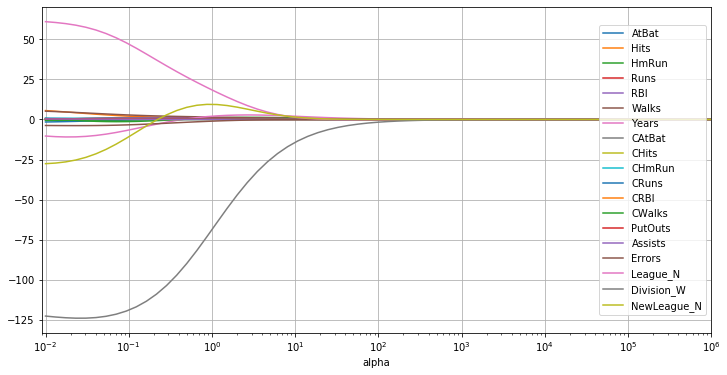

In [37]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.009,10**6))
plt.legend(loc='right');

In [38]:
# coefficients shrink to zero as alpha values increase

### Validation approach with alpha predefined

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.5,
                                                 random_state=1)

In [40]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train.shape

(131, 19)

In [42]:
Xtrain = pd.DataFrame(X_train)
Xtrain.std()

AtBat           146.929926
Hits             46.597298
HmRun             8.013040
Runs             26.105790
RBI              25.979087
Walks            23.070160
Years             4.793713
CAtBat         2322.125523
CHits           658.595947
CHmRun           88.964205
CRuns           327.352068
CRBI            354.166348
CWalks          249.131889
PutOuts         300.571362
Assists         142.273192
Errors            6.384012
League_N          0.501554
Division_W        0.501905
NewLeague_N       0.501905
dtype: float64

#### fit model with alpha = 4

In [43]:
np.set_printoptions(suppress=True)

In [44]:
ridge2 = Ridge(alpha=4*131)
ridge2.fit(X_train_scaled, y_train)
pred2 = ridge2.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred2)
mspe

106216.52238005561

In [45]:
# coefficients = ridge2.coef_/B[0].scale_
coefficients = ridge2.coef_/Xtrain.std()
pd.DataFrame(coefficients, index = X.columns)

,0
AtBat,0.098281
Hits,0.444388
HmRun,1.406707
Runs,0.658247
RBI,0.840178
Walks,1.004617
Years,2.769252
CAtBat,0.008212
CHits,0.034019
CHmRun,0.267607


#### fit model with huge alpha = 10^9

In [46]:
ridge3 = Ridge(alpha=131*10**9)
ridge3.fit(X_train_scaled, y_train)
pred3 = ridge3.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred3)
mspe

172862.234750706

In [47]:
# coefficients = ridge2.coef_/B[0].scale_
coefficients = ridge3.coef_/Xtrain.std()
pd.DataFrame(coefficients, index = X.columns)

,0
AtBat,1.312426e-09
Hits,4.629713e-09
HmRun,2.071912e-08
Runs,7.696629e-09
RBI,9.354729e-09
Walks,9.731861e-09
Years,3.946293e-08
CAtBat,1.056478e-10
CHits,3.978333e-10
CHmRun,2.948110e-09


In [48]:
# Huge alpha makes over-shrinking which increases test MSE

In [49]:
# all coeffs very close to zero

### Linear Regression (alpha = 0)

In [50]:
ols_model = Ridge(alpha=0)
ols_model.fit(X_train_scaled, y_train)
pred = ols_model.predict(X_test_scaled)          
ols_mse = mean_squared_error(y_test, pred)
ols_mse

116690.46856660275

In [51]:
# coefficients = ridge2.coef_/B[0].scale_
coefficients = ols_model.coef_/Xtrain.std()
pd.DataFrame(coefficients, index = X.columns)

,0
AtBat,-1.814151
Hits,4.242869
HmRun,-4.755147
Runs,-0.038612
RBI,3.969341
Walks,3.456855
Years,9.461914
CAtBat,-0.602815
CHits,2.166662
CHmRun,2.967913


In [52]:
# RR improved the test MSE over OLS

### MSPE varies with alpha

In [53]:
ridge_model = Ridge(alpha = 0)
mspes = []

In [54]:
for a in alphas:
    ridge_model.set_params(alpha = a * 131)
    ridge_model.fit(X_train_scaled, y_train)
    yhat = ridge_model.predict(X_test_scaled)
    value = mean_squared_error(y_test,yhat)
    mspes.append(value)

In [55]:
df = pd.DataFrame(mspes,columns = ['MSPE'])
df.index = alphas
df.index.name = 'alpha'
df

,MSPE
alpha,
1.000000e+10,172862.235804
7.564633e+09,172862.235766
5.722368e+09,172862.235716
4.328761e+09,172862.235651
3.274549e+09,172862.235563
...,...
3.053856e-02,102144.426231
2.310130e-02,102357.905350
1.747528e-02,102591.659514


In [56]:
# plot MSPE vs alpha

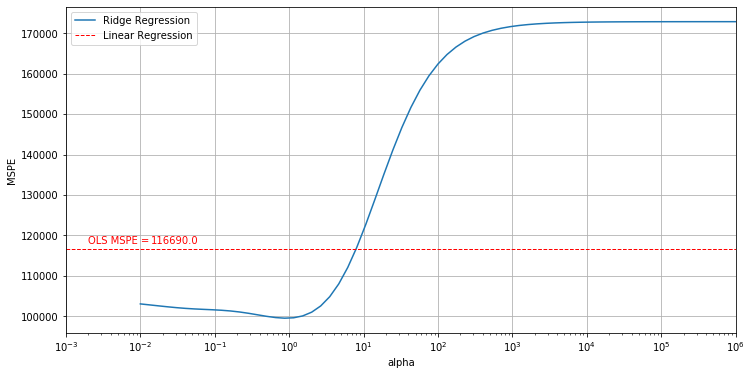

In [57]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.001,10**6))
# add horizontal line with OLS MSPE
plt.axhline(y = ols_mse,linestyle = '--',c='r',linewidth=1)
plt.annotate(round(ols_mse,0),xy=(0.014,1.01*ols_mse), c='r')
plt.annotate('OLS MSPE = ',xy=(0.002,1.01*ols_mse), c='r')
#
plt.ylabel('MSPE')
plt.legend(("Ridge Regression", "Linear Regression"));

In [58]:
# index of best alpha

In [59]:
mspes.index(min(mspes))

83

In [60]:
# best alpha (minimizing test MSE)

In [61]:
alphas[83]

0.8697490026177834

In [62]:
mspes[83]

99541.51776483622

In [63]:
# Minimum MPSE is 99541.517

## Ridge Regression  10-fold cross validation to find best alpha

In [64]:
ridge2 = Ridge(alpha=4*131)
ridge2.fit(X_train_scaled, y_train)
pred2 = ridge2.predict(X_test_scaled)          
mspe = mean_squared_error(y_test, pred2)
mspe

106216.52238005561

In [65]:
ridgecv = RidgeCV(alphas = 131*alphas,cv = 10,
                  scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train);

In [66]:
# best alpha (minimizing train MSE)

In [67]:
ridgecv.alpha_/131

0.4977023564332114

In [68]:
# test MSE of best alpha

In [69]:
yhatcv = ridgecv.predict(X_test_scaled)
best_mspe = mean_squared_error(y_test, yhatcv)
best_mspe

99997.3517290255

In [70]:
np.sqrt(best_mspe)

316.22357870504453

### predict salary of first player in test set

In [71]:
# coefficients of best RR model (when fitting train set)

In [72]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train_scaled,y_train)

Ridge(alpha=65.1990086927507)

In [73]:
df4 = pd.DataFrame(ridge4.coef_,index=X.columns,
                   columns=['ridge_coeff'])
df4

,ridge_coeff
AtBat,-5.634293
Hits,42.536803
HmRun,-4.641034
Runs,18.248238
RBI,35.234766
Walks,50.250768
Years,4.106227
CAtBat,13.698612
CHits,35.010687
CHmRun,47.649574


In [74]:
# Coefficients of best RR model (when fitting full dataset)

In [75]:
ridge4.fit(X,y)
pd.DataFrame(ridge4.coef_,index=X.columns,
                   columns=['ridge_coeff'])

,ridge_coeff
AtBat,-2.098697
Hits,7.652428
HmRun,3.184275
Runs,-2.153684
RBI,-0.488971
Walks,6.124918
Years,-2.552640
CAtBat,-0.174919
CHits,0.090927
CHmRun,-0.208067


In [76]:
newval = X_test[:1]
newval

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
126,282.0,78.0,13.0,37.0,51.0,29.0,5.0,1649.0,453.0,73.0,211.0,280.0,138.0,670.0,57.0,5.0,0.0,1.0,0.0


In [77]:
# predict salary (000s dollars)

In [78]:
ridge4.predict(newval)

array([569.88418992])

## Lasso Regression

In [79]:
# lasso may not converge unless large number of iterations

In [80]:
lasso_model = Lasso(max_iter = 10000, alpha = 0)

In [81]:
coefs = []
for a in alphas:
    lasso_model.set_params(alpha=a*131)
    lasso_model.fit(X_train_scaled,y_train)
    coefs.append(lasso_model.coef_/X_train.std())

In [82]:
# convert list of coefficients to a dataframe

In [83]:
df = pd.DataFrame(coefs)
df.columns = x.columns
df.index = alphas
df.index.name = 'alpha'
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
alpha,,,,,,,,,,,,,,,,,,,
1.000000e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
7.564633e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
5.722368e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
4.328761e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
3.274549e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.053856e-02,-1.908304,6.382441,-3.190295,-0.000000,1.658744,3.767515,-0.204433,-0.000000,0.000000,1.054881,0.001259,0.388032,-0.017439,0.414145,0.094857,-0.000000,31.198446,-119.486292,-0.000000
2.310130e-02,-2.101790,6.661596,-3.708342,-0.000000,1.958916,3.964500,-0.000000,-0.052464,0.000000,0.700922,0.348254,0.558756,-0.115886,0.413102,0.138813,-0.035728,35.501684,-118.017768,-0.000000
1.747528e-02,-2.214714,6.961633,-3.486691,-0.568646,2.144794,4.228289,-0.000000,-0.104095,0.025866,0.412492,0.668828,0.668495,-0.192277,0.414899,0.201905,-0.998792,43.113947,-117.438276,-4.824146


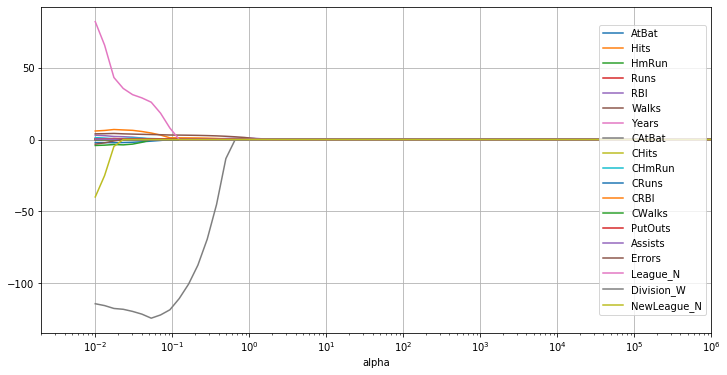

In [85]:
df.plot(figsize=(12,6),grid=True,logx=True,xlim = (0.002,10**6))
plt.legend(loc='right');

In [82]:
# coefficients shrink to zero as alpha values increase

## LASSO  10-fold cross validation to find best alpha

In [88]:
lassocv = LassoCV(alphas = alphas*131, cv=10, max_iter = 100000)
#                  scoring = 'neg_mean_squared_error')
lassocv.fit(X_train_scaled,y_train);

In [89]:
# best alpha (minimizing train MSE)

In [92]:
lassocv.alpha_

28.2230944394176

In [93]:
# test MSE of best alpha (creating new model)

In [108]:
lasso4 = Lasso(alpha = lassocv.alpha_,max_iter=100000)
lasso4.fit(X_train_scaled, y_train)
mean_squared_error(y_test,lasso4.predict(X_test_scaled))

105006.69234885278

In [109]:
# not as good as Ridge regression

In [110]:
df4 = pd.DataFrame(lasso4.coef_,index=X.columns,columns=['lasso_coeff'])
df4

,lasso_coeff
AtBat,0.000000
Hits,49.986581
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,66.527379
Years,0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,19.155726


In [111]:
# 13 regression coeffs equal to zero 
# (using best alpha found by cross validation)

In [112]:
df4[df4.lasso_coeff != 0]

,lasso_coeff
Hits,49.986581
Walks,66.527379
CHmRun,19.155726
CRBI,181.052856
PutOuts,109.955976
Division_W,-43.836560


In [92]:
# coefficients for new predictions -use full data

In [116]:
lasso4.fit(X_scaled, y)
df5 = pd.DataFrame(lasso4.coef_, index=X.columns, 
                   columns = ['lasso_coeff'])
df5

,lasso_coeff
AtBat,0.000000
Hits,79.748085
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,45.156924
Years,0.000000
CAtBat,0.000000
CHits,0.000000
CHmRun,0.000000


In [117]:
# predictors in lasso simplified model are

In [118]:
df5[df5.lasso_coeff != 0]

,lasso_coeff
Hits,79.748085
Walks,45.156924
CRuns,64.259036
CRBI,128.692010
PutOuts,53.368794
Division_W,-41.397589


### predict salary of first player in test set

In [121]:
newval = X_test_scaled[:1]
newval

array([[1.92664997, 1.68034262, 1.62858346, 1.42275086, 1.97065345,
        1.26186053, 1.04703683, 0.71285128, 0.69046731, 0.82370467,
        0.64704031, 0.79362385, 0.55604986, 2.23764494, 0.40217563,
        0.78621312, 0.        , 2.00005827, 0.        ]])

In [122]:
df3 = lasso4.predict(newval)
df3

array([415.36933707])

In [98]:
# predicted salary is 447,936 dollars